# Hypothesis Testing - Guided Practice

- ds-flex 
- xx/xx/xx

## US Health Insurance Dataset

- https://www.kaggle.com/teertha/ushealthinsurancedataset

In [27]:
## import the standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## import hypothesis testing functions
from scipy import stats

%load_ext autoreload
%autoreload 2
import functions as fn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv("data/insurance.csv")
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Questions to Answer

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are women and men equally likely to be smokers?
- Q3. Do different regions have different charges, on average?

## Q1: Do smokers have higher charges than non-smokers?

### Formally State the Hypothesis
- $H_1$ : Smokers have higher charges than non-smokers.

- $H_0$ : Smokers and non-smokers are charged the same. 

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


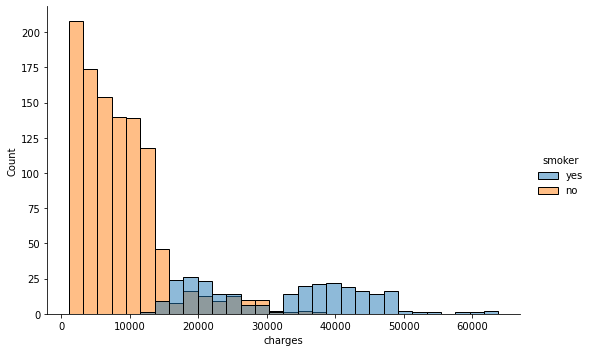

In [16]:
## let's visualize the distrubtion of charges for smokers and non-smokers
g = sns.displot(data=df,hue='smoker',x='charges',aspect=1.5)

In [12]:
## save all charges for smokers in a new smokers variable
smokers = df.loc[ df['smoker']=='yes','charges']
smokers

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [13]:
## now do the same for the non-smokers
nonsmokers = df.loc[ df['smoker']=='no','charges']
nonsmokers

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [23]:
## Run the correct hypothesis test from scipy
result = stats.ttest_ind(smokers,nonsmokers)
result

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [25]:
## is the result significant?
result.pvalue < .05

True

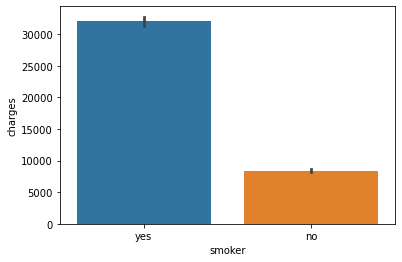

In [20]:
## Make a barplot of the average charges for smokers vs non-smokers
ax = sns.barplot(data=df,x='smoker',y='charges',ci=68)

In [33]:
## calcualte the effect size using cohen's d
d = fn.Cohen_d(smokers,nonsmokers)
d

INTERPRETATION OF COHEN's D: 
    > Small effect = 0.2
    > Medium Effect = 0.5
    > Large Effect = 0.8
    


3.160132313169358

### Conclusion/Interpretation

- Smokers have significantly higher insurance charges than non-smokers (p<.05), with a large effect size (Cohen's d=3.16). 

## Q2: Are women and men equally likely to be smokers?

### Formally State the Hypothesis
- $H_1$ :

- $H_0$ :

In [36]:
## Get contingency table 
observed = pd.crosstab(df['smoker'],df['sex'])
observed

sex,female,male
smoker,,
no,547,517
yes,115,159


In [39]:
## perform the correct test for the hypothesis
result = stats.chisquare(observed,axis=None)
result

Power_divergenceResult(statistic=470.68161434977577, pvalue=1.0764888255350323e-101)

In [40]:
result.pvalue <.05

True

<AxesSubplot:xlabel='sex', ylabel='count'>

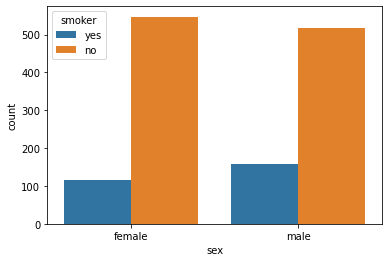

In [42]:
sns.countplot(data=df,x='sex',hue='smoker')

In [50]:
#  pd.crosstab(df['smoker'],df['sex'],normalize='columns')

### Conclusion/Interpretation

-  

## Q3: Do different regions have different insurance charges?

### Formally State the Hypothesis
- $H_1$ :
- $H_0$ : 

In [52]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


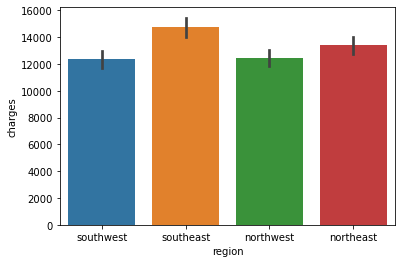

In [55]:
sns.barplot(data=df, x='region',y='charges',ci=68);

In [59]:
## separate out the data by groups
groups = {}

for region in df['region'].unique():
    data = df.loc[ df['region']==region, 'charges']
    data.name = region
    groups[region] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [60]:
groups['southeast']

1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: southeast, Length: 364, dtype: float64

In [69]:
groups.values()

dict_values([0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: southwest, Length: 325, dtype: float64, 1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: southeast, Length: 364, dtype: float64, 3       21984.47061
4        3866.85520
7        7281.50560
9       28923.13692
24       6203.90175
           ...     
1319     7201.70085
1320     5425.02335
1324     4239.89265
1333    10600.54830
1337    29141.36030
Name: northwest, Length: 325, dtype: float64, 8        6406.41070
10       2721.32080
16      10797.33620
17       2395.17155
20      13228.84695
           ...     
1321    28101.33305
1325    13143.33665
1326     7050.02130
1328    22395.74424


In [73]:
## perform the correct hypothesis test
result = stats.f_oneway(*groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [75]:
result.pvalue < .05

True

In [76]:
## but which groups are different?

In [77]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [84]:
## save the charges column as values and the region as labels
values = df['charges']
labels = df['region']

In [87]:
## perform tukey's multiple comparison test
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7002,-3428.9473,1451.329,False
northeast,southeast,1329.0269,0.4754,-1044.9543,3703.0081,False
northeast,southwest,-1059.4471,0.6584,-3499.5853,1380.691,False
northwest,southeast,2317.8361,0.0583,-54.212,4689.8842,False
northwest,southwest,-70.638,0.9,-2508.8955,2367.6195,False
southeast,southwest,-2388.4741,0.0477,-4760.5221,-16.426,True


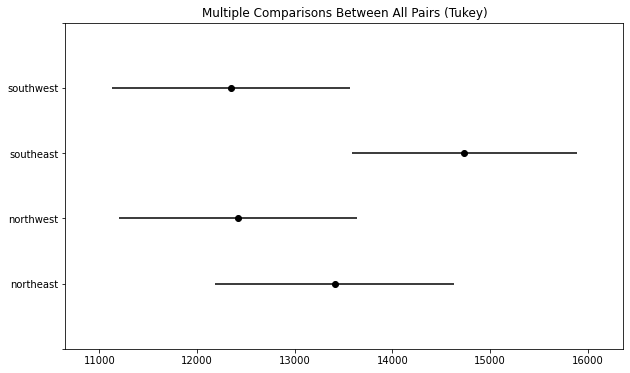

In [90]:
tukeys_results.plot_simultaneous();

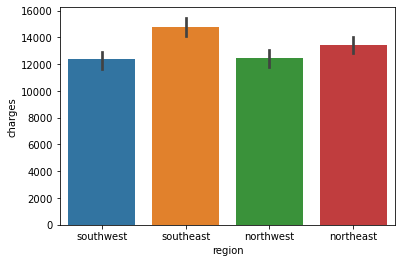

In [91]:
sns.barplot(data=df, x='region',y='charges',ci=68);

### Conclusion/Interpretation

-  

# Conclusion/Recap